---
# TITLE: A DATA DETERMINATION FOR CAR HIRING AND RENTAL BUSINESS 
---

### PROJECT DESCRIPTION:
This project is to analyse on the different vehicle in terms of Make and Model, Engine size and Cylinder, Vehicle Class and Transmission, Fuel, Fuel comsumption and  Emmision amongest others, so as to make the right decision of the right kind of vehicle to deal with  in the competitive market. This market may also vary dippending on the occasion, intended purposes and the economic status present.  

### PROBLEM STATEMENT
Due to the competitive environment of car hiring and rental business, it is much difficult to know the most effective and reliable vehicle in trend than can be selected so as to suit the competitive evironment. We therefore deep into the data available, analyses the trend of the vihecle in thier different ways of categories, so as to give the best advice on the possible vehicle depending on the occasion, intended purpose and more economical, that can suite the business competition,  and even able to beat the competitive environment.


### OBJECTIVES

- To be able to load the Data, Display/Examine it in different ways (number of columns and rows, descriptions, info, etc), and to do the cleaning of the Data, for smooth analyzatio process.
- Exermine the different relations the data in terms of the Class vs Fuel Comsumption, Class vs Engine and Cylinder distributions etc, so as to check on there respective trends.
- Perform the statistical technique that predicts the different effects of the vehicle based on transition, the fuel consumption and emission.
- Give the best advice based on the analysis, on the appropriate vehicle suitable for the intended business.

# DATA
---

## 1.0 Data Display And Data Cleaning

### 1.0.1 Libraries importation and data viewing in different ways

In [2]:
# importations on the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

In [3]:
# The Reading And Display of the Data
Data = pd.read_csv("Fuel_Consumption_2000_2022.csv")
Data.head(10)

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198
5,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,M5,X,9.3,6.8,8.2,34,189
6,2000,ACURA,INTEGRA GSR/TYPE R,SUBCOMPACT,1.8,4,M5,Z,9.4,7.0,8.3,34,191
7,2000,ACURA,NSX,SUBCOMPACT,3.0,6,AS4,Z,13.6,9.2,11.6,24,267
8,2000,ACURA,NSX,SUBCOMPACT,3.2,6,M6,Z,13.8,9.1,11.7,24,269
9,2000,AUDI,A4,COMPACT,1.8,4,A5,Z,11.4,7.2,9.5,30,218


In [4]:
#obtaining breif infomation about this data
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


In [5]:
#checking on the columns of the dataset
Data.columns

Index(['YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
       'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS'],
      dtype='object')

In [6]:
#checking on the dataset shape
Data.shape

(22556, 13)

In [7]:
#checking the datatype of each columns
Data.dtypes

YEAR                  int64
MAKE                 object
MODEL                object
VEHICLE CLASS        object
ENGINE SIZE         float64
CYLINDERS             int64
TRANSMISSION         object
FUEL                 object
FUEL CONSUMPTION    float64
HWY (L/100 km)      float64
COMB (L/100 km)     float64
COMB (mpg)            int64
EMISSIONS             int64
dtype: object

In [8]:
# checking the data description
Data.describe()

,YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
count,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000
mean,2011.554442,3.356646,5.854141,12.763513,8.919126,11.034341,27.374534,250.068452
std,6.298269,1.335425,1.819597,3.500999,2.274764,2.910920,7.376982,59.355276
min,2000.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2006.000000,2.300000,4.000000,10.400000,7.300000,9.100000,22.000000,209.000000
50%,2012.000000,3.000000,6.000000,12.300000,8.400000,10.600000,27.000000,243.000000
75%,2017.000000,4.200000,8.000000,14.725000,10.200000,12.700000,31.000000,288.000000
max,2022.000000,8.400000,16.000000,30.600000,20.900000,26.100000,78.000000,608.000000


### 1.0.2 Data Cleaning

In [9]:
#obtainiong the dataset copy
Data1=Data.copy()
Data1.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [10]:
#checking null values
Data1.isna().sum()

YEAR                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
HWY (L/100 km)      0
COMB (L/100 km)     0
COMB (mpg)          0
EMISSIONS           0
dtype: int64

In [11]:
#Checking duplicated value
Data1.duplicated().sum()

1

In [12]:
#droping the duplicate
Data11=Data1.drop_duplicates()

In [13]:
#checking the existence of the duplicate
Data11.duplicated().sum()

0

In [14]:
#Renaming 
Df=Data11
Df

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22551,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
22552,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219
22553,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232
22554,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236


## 2.0 Data Exermination In Different Relations

In [15]:
#counting number of vehicles existing in there respective vehicle make
Vehicle_Make_Count=Df["MAKE"].value_counts()
Vehicle_Make_Count

MAKE
CHEVROLET        1725
BMW              1490
GMC              1357
FORD             1276
MERCEDES-BENZ     935
                 ... 
ALFA ROMEO          8
SRT                 4
GENESIS             4
BUGATTI             3
PLYMOUTH            2
Name: count, Length: 87, dtype: int64

In [16]:
#counting number of vehicles existing in there respective vehicle Model
Vehicle_Model_Count=Df["MODEL"].value_counts()
Vehicle_Model_Count

MODEL
JETTA          89
MUSTANG        88
RANGER         61
SENTRA         58
ALTIMA         57
               ..
Optima FE       1
ARNAGE RL       1
BROOKLANDS      1
335d SEDAN      1
XC60 B6 AWD     1
Name: count, Length: 4242, dtype: int64

In [17]:
#counting number of vehicles existing in there respective vehicle class
Vehicle_Class_Count=Df["VEHICLE CLASS"].value_counts()
Vehicle_Class_Count

VEHICLE CLASS
SUV                         2639
COMPACT                     2636
MID-SIZE                    2300
PICKUP TRUCK - STANDARD     1689
SUBCOMPACT                  1559
FULL-SIZE                   1086
TWO-SEATER                   999
SUV: Small                   929
SUV - SMALL                  827
MINICOMPACT                  783
STATION WAGON - SMALL        737
Mid-size                     660
SUV: Standard                608
Pickup truck: Standard       515
SUV - STANDARD               514
Compact                      491
Subcompact                   451
Full-size                    417
PICKUP TRUCK - SMALL         403
MINIVAN                      366
STATION WAGON - MID-SIZE     343
VAN - CARGO                  332
Two-seater                   313
VAN - PASSENGER              287
Minicompact                  211
Station wagon: Small         140
Pickup truck: Small          108
Special purpose vehicle       62
SPECIAL PURPOSE VEHICLE       52
Station wagon: Mid-size      

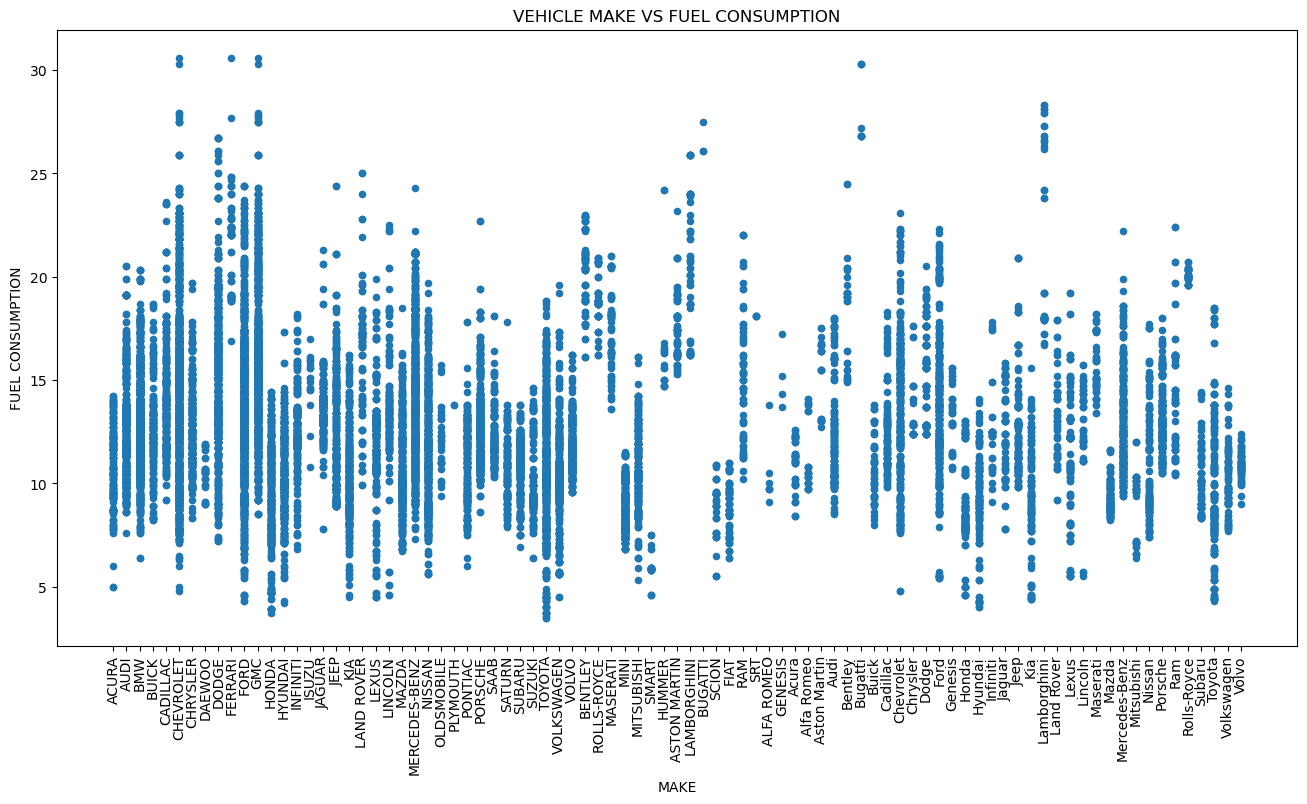

In [18]:
Df.plot.scatter(figsize=(16,8), y="FUEL CONSUMPTION", x="MAKE", title="VEHICLE MAKE VS FUEL CONSUMPTION", rot=90);

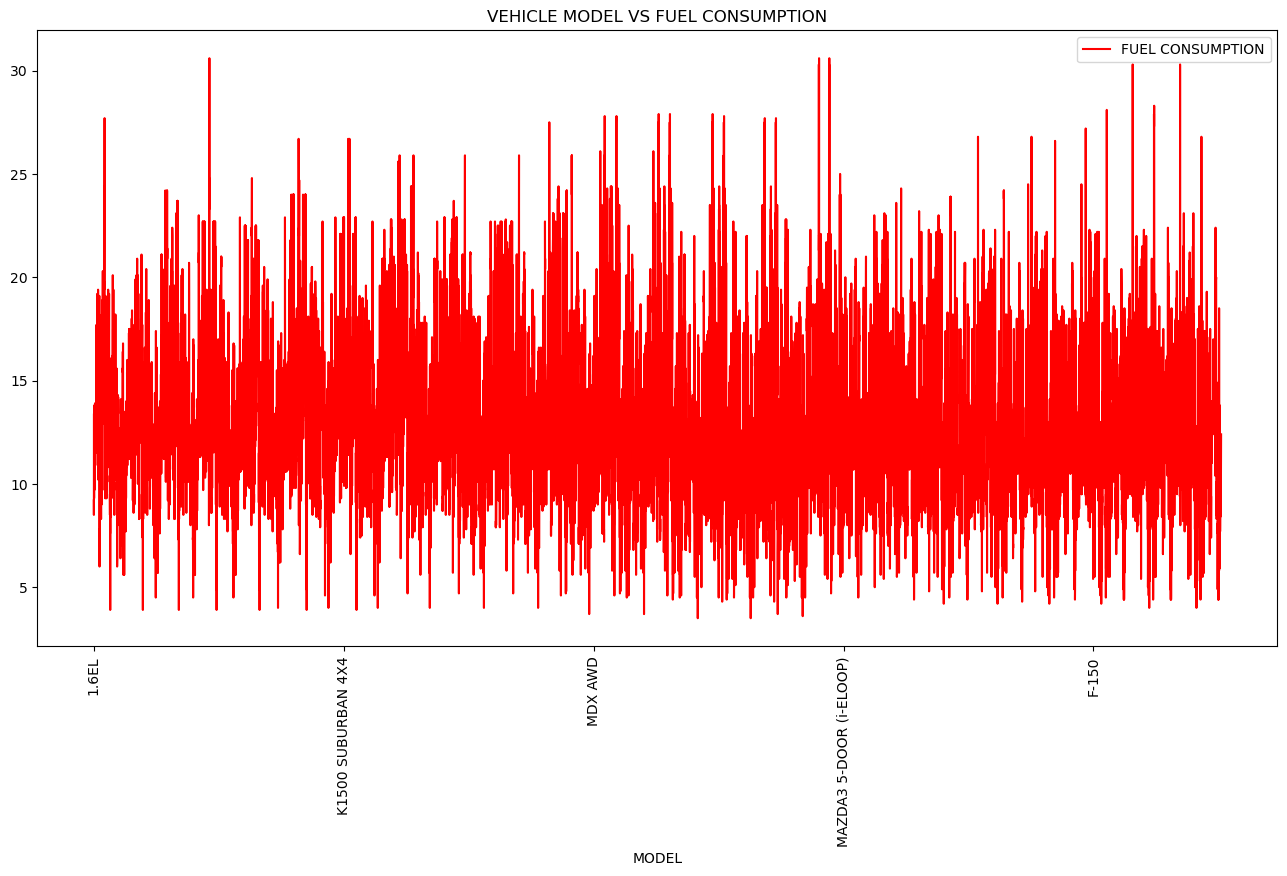

In [19]:
Df.plot.line(figsize=(16,8), y="FUEL CONSUMPTION", x="MODEL", title="VEHICLE MODEL VS FUEL CONSUMPTION",color="r", rot=90);

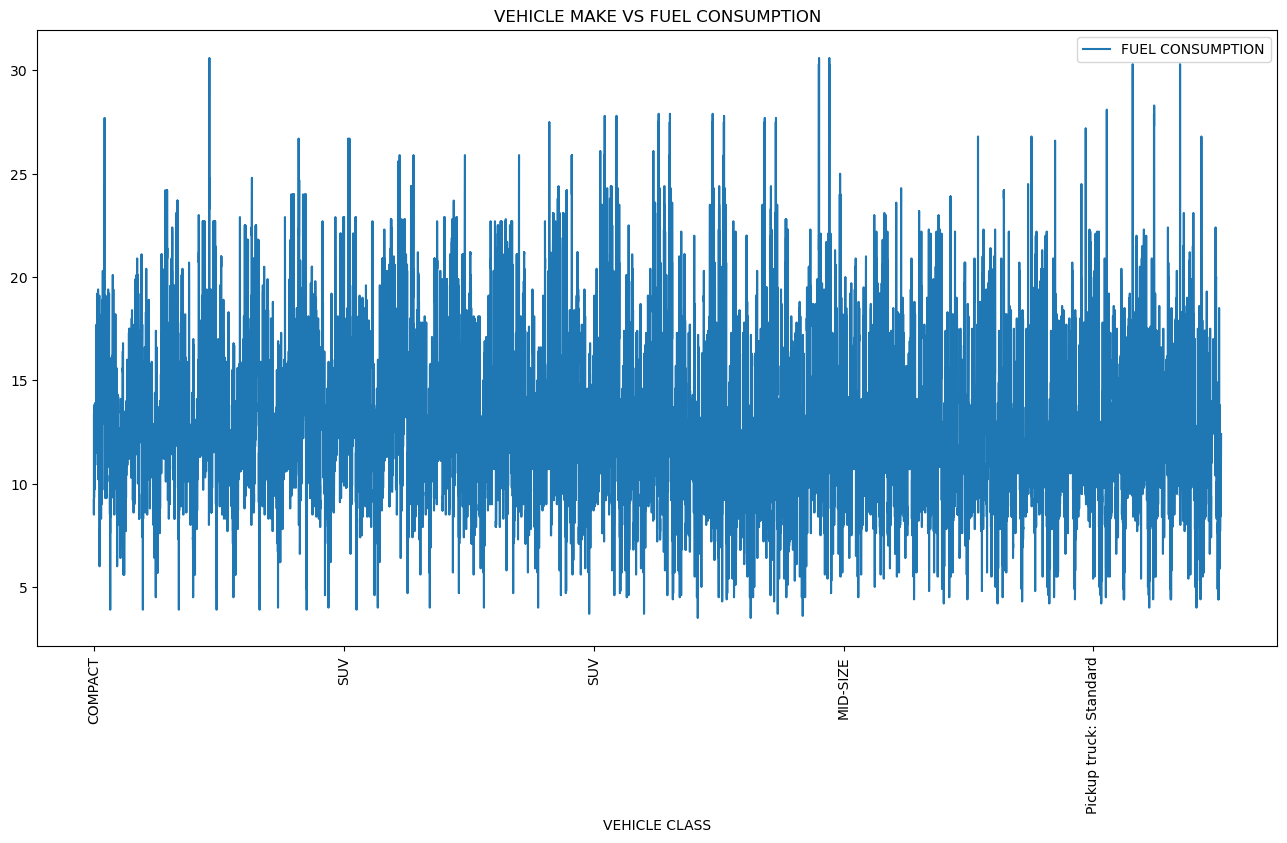

In [24]:
Df.plot.line(figsize=(16,8), y="FUEL CONSUMPTION", x="VEHICLE CLASS", title="VEHICLE MAKE VS FUEL CONSUMPTION", rot=90);

In [40]:
Data2=Data1["FUEL CONSUMPTION"]>=10
Data2

0        False
1        False
2         True
3         True
4         True
         ...  
22551     True
22552     True
22553     True
22554     True
22555     True
Name: FUEL CONSUMPTION, Length: 22556, dtype: bool